Classes: ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
Image counts per class: {'VeryMildDemented': 1495, 'ModerateDemented': 1424, 'MildDemented': 1749, 'NonDemented': 2067}


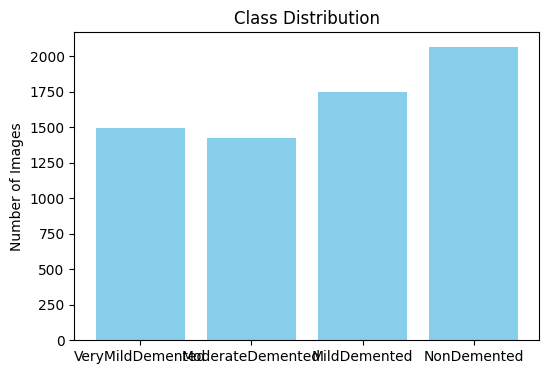

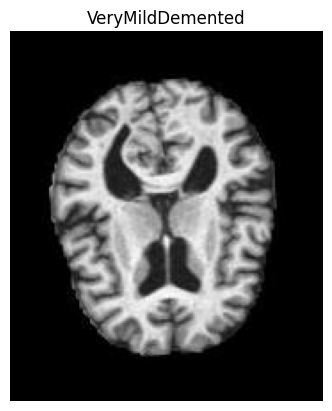

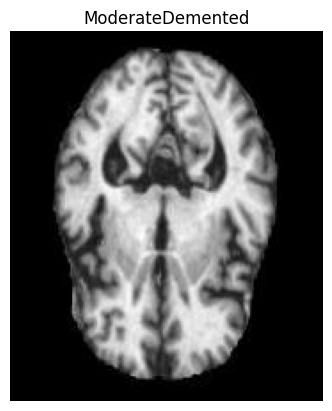

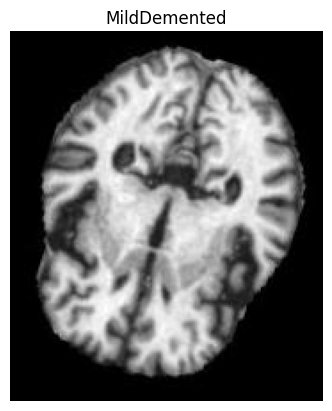

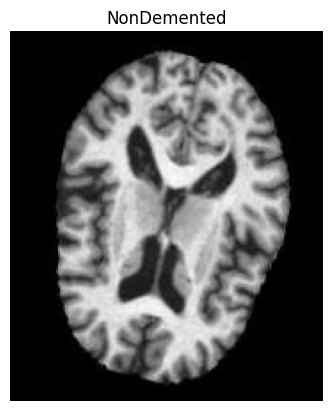

CSV saved with all image paths and labels: ../data/dataset_paths.csv


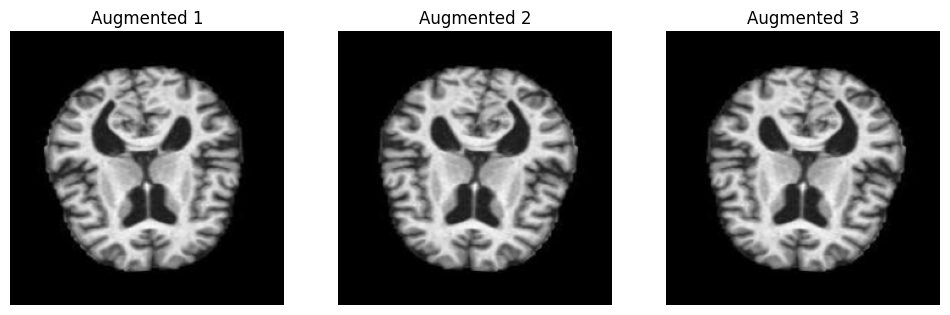

In [3]:
# =========================================
# 02_preprocessing.ipynb
# =========================================

# -----------------------------
# 1️⃣ Setup
# -----------------------------
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
import torch

data_dir = "../data/"

# Only keep directories (ignore .DS_Store or any files)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Classes:", classes)

# -----------------------------
# 2️⃣ Dataset Exploration
# -----------------------------
# Count images per class (only jpg/png)
class_counts = {}
for cls in classes:
    folder_path = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(folder_path) if f.endswith((".jpeg", ".png"))]
    class_counts[cls] = len(images)

print("Image counts per class:", class_counts)

# Visualize class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

# -----------------------------
# 3️⃣ Sample Images
# -----------------------------
# Show first image from each class
for cls in classes:
    folder_path = os.path.join(data_dir, cls)
    image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpeg", ".png"))]
    if image_files:
        sample_img_path = os.path.join(folder_path, image_files[0])
        img = Image.open(sample_img_path)
        plt.imshow(img, cmap="gray")
        plt.title(cls)
        plt.axis("off")
        plt.show()

# -----------------------------
# 4️⃣ Optional: Save CSV of all image paths and labels
# -----------------------------
all_images, all_labels = [], []

for idx, cls in enumerate(classes):
    folder_path = os.path.join(data_dir, cls)
    image_files = [f for f in os.listdir(folder_path)]
    for f in image_files:
        all_images.append(os.path.join(folder_path, f))
        all_labels.append(idx)

df = pd.DataFrame({"image": all_images, "label": all_labels})
csv_path = "../data/dataset_paths.csv"
df.to_csv(csv_path, index=False)
print(f"CSV saved with all image paths and labels: {csv_path}")

# -----------------------------
# 5️⃣ Optional: Preview augmentations (for visualization only)
# -----------------------------
sample_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
    ]
)

# Pick first image from first class
if all_images:
    img = Image.open(all_images[0])

    # Show 3 augmented versions
    plt.figure(figsize=(12, 4))
    for i in range(3):
        aug_img = sample_transform(img)
        # Convert tensor to HWC if it's a tensor
        aug_img_np = (
            aug_img.permute(1, 2, 0).numpy()
            if isinstance(aug_img, torch.Tensor)
            else aug_img
        )
        plt.subplot(1, 3, i + 1)
        plt.imshow(aug_img_np)
        plt.title(f"Augmented {i+1}")
        plt.axis("off")
    plt.show()